In [1]:
#CELL 1 - IMPORTS & CHANGEMENT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- chargement ----------
movie_cols = ["id", "title", "release_date", "video_release", "imdb_url"] \
             + [f"g{i}" for i in range(19)]
movies = pd.read_csv(
    "movies.csv",
    sep="|",
    names=movie_cols,
    encoding="latin-1"      # <-- CORRECTIF encodage
)

rating_cols = ["user", "movie", "score", "timestamp"]
ratings = pd.read_csv(
    "ratings.csv",
    sep="\t",               # <-- CORRECTIF séparateur
    names=rating_cols
)

# ---------- reconstruction des genres ----------
genre_names = [
    "Action","Adventure","Animation","Children","Comedy","Crime","Documentary",
    "Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
    "Thriller","War","Western","(no genres listed)"
]
movies["genres"] = movies[[f"g{i}" for i in range(19)]].apply(
    lambda row: [g for g, flag in zip(genre_names, row) if flag == 1],
    axis=1
)

# ---------- enrichissement ----------
enriched = ratings.merge(
    movies[["id", "title", "genres"]],
    left_on="movie",
    right_on="id"
)

print("✓ Données enrichies :", enriched.shape)


✓ Données enrichies : (100000, 7)


In [8]:
#CELL 2 - Volume & note moyenne par film

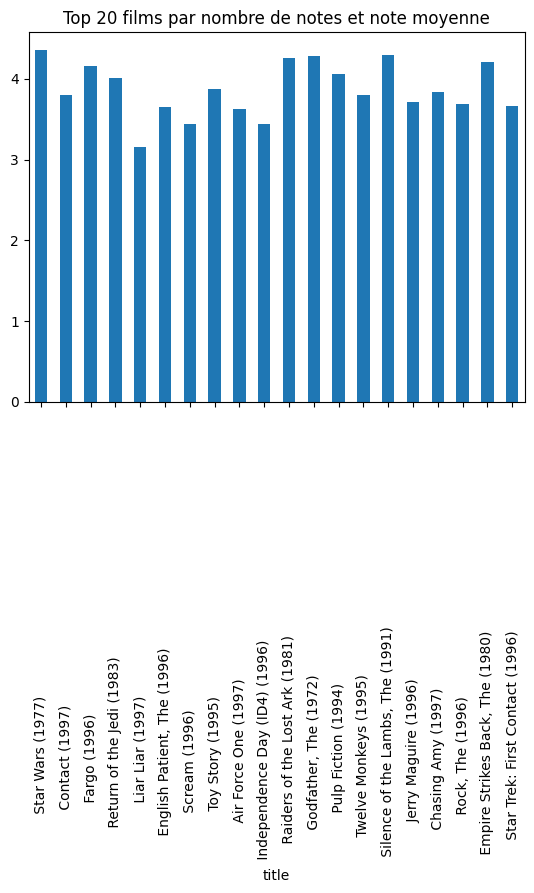

In [ ]:
stats = enriched.groupby("title")["score"] \
                .agg(count="count", avg="mean") \
                .sort_values("count", ascending=False).head(20)
stats.plot.bar(y="avg", legend=False)
plt.title("Top 20 films par nombre de notes et note moyenne")
plt.show()


In [6]:
#CELL 3 - Distribution des notes

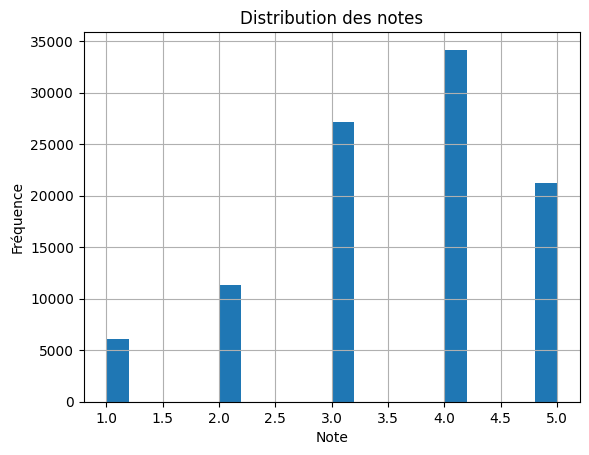

In [ ]:
enriched["score"].hist(bins=20)
plt.title("Distribution des notes")
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
#CELL 4 - Stats par genre

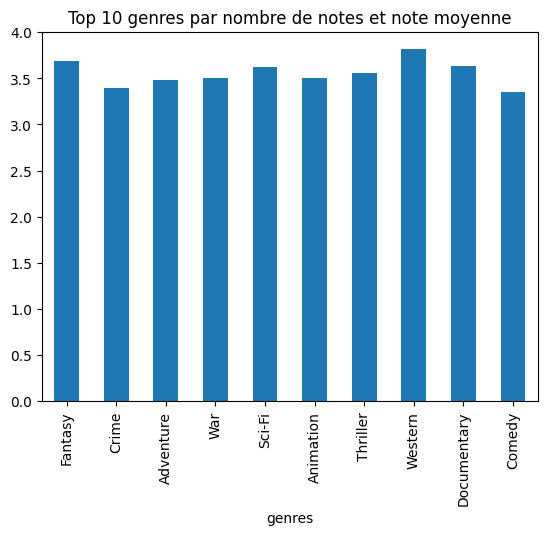

In [13]:
exploded = enriched.explode("genres")
g = exploded.groupby("genres")["score"] \
            .agg(count="count", avg="mean") \
            .sort_values("count", ascending=False).head(10)
g.plot.bar(y="avg", legend=False)
plt.title("Top 10 genres par nombre de notes et note moyenne")
plt.show()
